# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# 1. Is the distribution of body temperatures normal?

In [14]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import normaltest
import matplotlib.pyplot as plt
df = pd.read_csv('data/human_body_temperature.csv')

In [6]:
#Use scipy normaltest to calculate the model likeness to normal distribution
normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

P-value > 0.05, thus the data is most likely a normal model

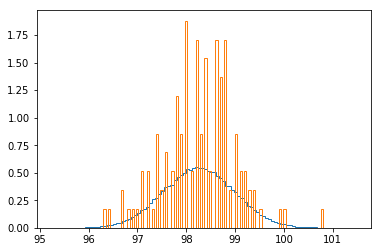

In [161]:
#Create bell curve model
samples_norm=np.random.normal(np.mean(df['temperature']),np.std(df['temperature']),100000)
_=plt.hist(samples_norm,bins=100,normed=True,histtype='step')
_=plt.hist(df['temperature'],bins=100,normed=True,histtype='step')
plt.show()

In [162]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n=len(data)
    x=np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

x_theor, y_theor = ecdf(samples_norm)
x, y = ecdf(df['temperature'])

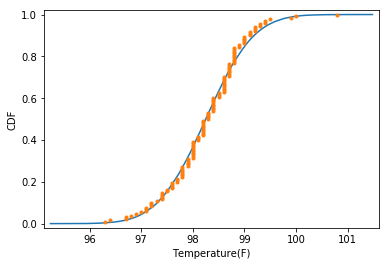

In [163]:
#CDF curve
aaa = plt.plot(x_theor, y_theor)
aaa = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
aaa = plt.xlabel('Temperature(F)')
aaa= plt.ylabel('CDF')
plt.show()

# 3. Is the true population mean really 98.6 degrees F?

In [167]:
#Bootstrap method
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates

translated_temp = df['temperature']-np.mean(df['temperature'])+98.6
bs_replicates0 = draw_bs_reps(df['temperature'], np.mean, 10000)
p = np.sum(bs_replicates0 >= 98.6) / 10000

# Print the p-value
print('p = ', p)

p =  0.0


Using the bootstrap hypothesis test, we reject that the true population temperature mean is 98.6 F

In [169]:
#One sample t-test
import scipy.stats as t_test
t_test.ttest_1samp(df['temperature'],98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [170]:
#One sample z-test
import statsmodels.stats.weightstats as z_test
z_test.ztest(df['temperature'],value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

All tests result in the rejection of null hypothesis. One sample test was done because there is only one variable involved in the test instead of comparing a particular dataset to another dataset. z-test is chosen because the sample has big enough sample size >30 and is independent.

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [183]:
random10=np.random.choice(df['temperature'], size=10)

In [184]:
t_test.ttest_1samp(random10,98.6)

Ttest_1sampResult(statistic=-3.3587385277796522, pvalue=0.0084059894384316425)

In [185]:
z_test.ztest(random10,value=98.6)

(-3.3587385277796522, 0.00078299114822733419)

T-test. T-test's p-value are generally higher than Z-test. T-test are used for sample smaller than 30 because its suppose to deal with samples not population.

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [198]:
#Bootstrap confidence interval
percentiles=np.array([2.5,97.5])
ptiles_temps=np.percentile(bs_replicates0,percentiles)
ptiles_temps

array([ 98.12305769,  98.37155769])

In [214]:
z_test.ztest(df['temperature'],value=98.39336)

(-2.2413581812365453, 0.025002883042355893)

In [227]:
z_test.ztest(df['temperature'],value=98.1051)

(2.241382105899572, 0.025001334601632199)

In [238]:
t_test.ttest_1samp(df['temperature'],98.39506)

Ttest_1sampResult(statistic=-2.2677949344736552, pvalue=0.02500445187582109)

In [249]:
t_test.ttest_1samp(df['temperature'],98.1034)

Ttest_1sampResult(statistic=2.2678188591366819, pvalue=0.025002950928772867)

From all 3 tests done we can be 95% confident that the mean temperature is between 98.1 and 98.4 F. This means, something not in this range can be considered "abnormal".

# 6. Is there a significant difference between males and females in normal temperature?

In [250]:
#Split the dataset
df_male=df.loc[df['gender']=='M']
df_female=df.loc[df['gender']=='F']

In [251]:
#Bootstrap method
mean_count = np.mean(df['temperature'])
male_shifted = df_male['temperature'] - np.mean(df_male['temperature']) + mean_count
female_shifted = df_female['temperature'] - np.mean(df_female['temperature']) + mean_count
bs_reps_male = draw_bs_reps(male_shifted, np.mean, size=10000)
bs_reps_female = draw_bs_reps(female_shifted, np.mean, size=10000)
bs_replicates = bs_reps_female-bs_reps_male
p = np.sum(bs_replicates >= np.mean(np.mean(df_female['temperature'])-df_male['temperature'])) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0115


In [252]:
#Z-test method
z_test.ztest(df_male['temperature'],df_female['temperature'])

(-2.2854345381656103, 0.02228736076065755)

In [253]:
#T-test method
t_test.ttest_ind(df_male['temperature'],df_female['temperature'])

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

P-value for all tests showed value below 0.05. Thus, we can reject the hypothesis that male and female normal temperatures are the same.
